## Clustering Formula One Drivers by Race-Day Performance: An Unsupervised Learning Approach

## 🏎️**INTRODUCTION**
In Formula One, assessing a driver's performance goes beyond podium finishes. This project explores whether we can group drivers based on their full race day profiles using unsupervised learning. The goal is to identify meaningful driver categories that reflect how races are executed, not just how they end. For this project, we wanted to understand whether unsupervised learning techniques could uncover hidden patterns in driver performance using historical F1 data.

We aim to answer a compelling question:
Can F1 drivers be grouped into meaningful performance clusters using unsupervised learning techniques?

To explore this, we use a comprehensive dataset from Kaggle that spans decades of Formula 1 history, covering every Grand Prix from 1950 to 2024. It includes detailed records of race results, driver statistics, and various race day attributes.
You can find the dataset here:
https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

By integrating and engineering performance-related features from this dataset, we create a complete view of each driver's race day behavior. We then apply a suite of unsupervised techniques including Principal Component Analysis (PCA), Singular Value Decomposition (SVD), matrix completion, KMeans clustering, and hierarchical clustering to uncover hidden patterns and driver groupings that go beyond conventional statistics.

## 👨‍🔧**THEORETICAL BACKGROUND**
Unsupervised learning is a category of machine learning techniques used when the dataset lacks labeled outcomes or ground truth targets. Unlike supervised learning, where models are trained on input-output pairs, unsupervised methods seek to uncover hidden patterns, groupings, or structures in data purely based on the features provided.

In this project, we use unsupervised learning to explore whether drivers can be grouped based on similarities in their race-day behaviors. To do this effectively, we need to reduce the high dimensionality of our dataset and handle incomplete records. We achieve this through three core techniques: Principal Component Analysis (PCA), Singular Value Decomposition (SVD), and matrix completion via SoftImpute. These techniques allow us to project the data into a lower-dimensional space that preserves essential structure, fill in missing values, and ultimately apply clustering (via KMeans) to identify interpretable groups of driver performance. 
#### **Principal Component Analysis (PCA)**:
PCA is a dimensionality reduction technique that projects high-dimensional data onto a lower-dimensional subspace using eigenvectors of the data's covariance matrix. It preserves as much variance as possible and helps reveal underlying structure.

Let X be a standardized data matrix of shape n × p.

Compute the covariance matrix:
C = (1 / (n - 1)) * Xᵀ * X

Perform eigen decomposition:
C * vᵢ = λᵢ * vᵢ

Project data onto the eigenvectors (principal components):
Z = X * V

*Tuning* : Number of components is chosen to explain a target percentage of variance (e.g., 95%).

*Interpretation*: The loadings of each variable on the principal components help explain their contribution.

*Limitation*: Assumes linearity and orthogonal components.


#### **Singular Value Deciomposition(SVD)**:
SVD factorizes a matrix into three parts: X = U * Σ * Vᵀ. It is a powerful tool for reducing the dimensionality of datasets while preserving their structure. In this project, we use SVD to understand how variance is distributed across features and to project the high-dimensional driver performance data into a lower-dimensional space for clustering.

U ∈ ℝⁿˣʳ: left singular vectors

Σ ∈ ℝʳˣʳ: diagonal matrix of singular values

V ∈ ℝᵖˣʳ: right singular vectors (principal directions)

r: rank of X

*Application*: Used to compute explained variance, project data into low-dimensional space, and fill in missing values.

*Limitation*: Sensitive to scaling and missing data.


#### **Matrix Completion**
The Formula One data that is used is a real-world dataset, so it has some missing values, like some races do not have the information of lap time. Matrix completion using SVD allowed us to impute these missing values by iteratively estimating them using low-rank approximations via SVD. This is an important step to avoid losing essential rows of data, and to ensure reliable cluster results.

#### **KMeans Clustering**
To uncover the groupings among drivers,  K-Means clustering algorithm has been applied to the PCA-transformed data set. This step helped us simplify and interpret the hmatrigh-dimensional data more effectively.

K-Means Clustering is an Unsupervised Machine Learning algorithm which groups unlabeled dataset into different clusters. It is used to organize data into groups based on their similarity. The task is to categorize those drivers into groups. To achieve this we will use the K-means algorithm. 'K' in the name of the algorithm represents the number of groups/clusters we want to classify our drivers into.[1]

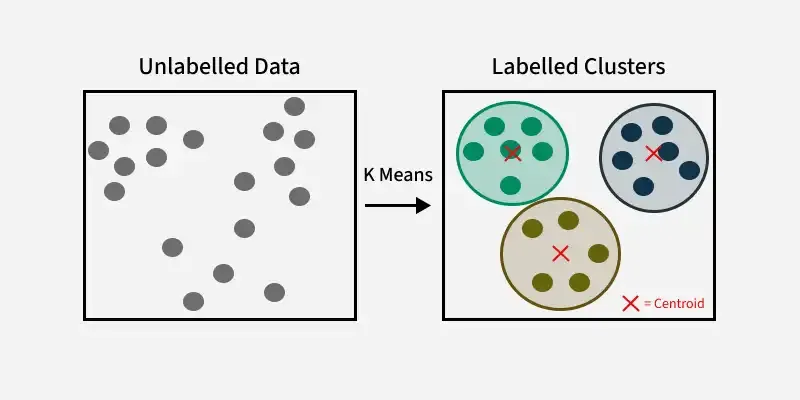 [1]

The goal of KMeans is to minimize the variance within each cluster while maximizing the differences between clusters. This is evaluated through two common metrics:

*Within-Cluster Sum of Squares (WSS)*: Measures the compactness of each cluster.

*Silhouette Score*: Indicates how well each point lies within its cluster relative to other clusters.

KMeans assumes that clusters are spherical and evenly sized, which makes it a good match for PCA-transformed data where redundant dimensions and noise have already been reduced. It is computationally efficient and easy to implement, performing best when clusters are well-separated and balanced in size.

#### **Hierarchical Clustering**
Hierarchical clustering is a technique used to group similar data points together based on their similarity creating a hierarchy or tree-like structure. The key idea is to begin with each data point as its own separate cluster and then progressively merge or split them based on their similarity.[2]

To validate and further explore the structure of our driver groupings, we also applied hierarchical clustering. Unlike KMeans, which requires specifying a fixed number of clusters in advance, hierarchical clustering builds a tree structure that reveals how observations relate to one another across different levels of similarity. This flexible and layered approach helps us identify both broad groupings and more refined subgroups of drivers.

We experimented with several types of linkage methods including single linkage, complete linkage, average linkage, centroid linkage, and Ward linkage. Each of these methods defines the distance between clusters in a different way, which influences how the tree is built and how clusters form.

For each method, we calculated a linkage matrix and visualized the results using dendrograms. These diagrams helped us see the nested relationships among drivers, showing which individuals or groups were most similar to one another. By changing the cut level on the tree, we could explore clustering solutions with different numbers of groups, typically between two and six.

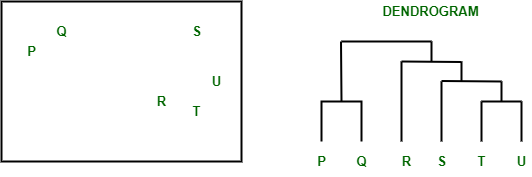
[2]

This hierarchical approach added valuable detail to our analysis. It allowed us not only to identify clusters, but also to understand how similar or distinct different clusters were. When used alongside KMeans, hierarchical clustering gave us a more complete picture of driver performance patterns and confirmed many of the groupings we observed in our PCA visualizations.



## 🏁**METHODOLOGY**

To analyze trends and patterns in Formula One driver performance, we began by selecting and integrating several key datasets from Kaggle. These included results.csv, qualifying.csv, pit_stops.csv, and lap_times.csv, which together provided insights into crtical race day performance factors like the starting grid position, finish position, pit strategy, and lap performance consistency.

*DATA PREPARATION AND INTEGRATION*: To construct a well-structured dataset for unsupervised learning, we began by merging four core data tables: results qualifying, pit_stops, and lap_times. These were joined using the IDs of the race and drivers to build a comprehensive, driver-level performance matrix.

*FEATURE ENGINEERING*: We focussed only on quantitative features directly tied to driver performance on race day. This included average starting and finishing position, mean of pit stops, average lap time per race. This has created a comprehensive view of how each driver performs during race conditions.

*HANDLING THE CATEGORICAL FEATURES*: the categorical dentifiers such as IDs of the drivers, races, and constructors were removed from the dataset prior to modeling

Therefore, before analysis, we removed categorical identifiers like raceId, driverId, and constructorId, as they do not carry numerical meaning. All numeric features were standardized using StandardScaler to ensure equal contribution to distance-based methods such as PCA and clustering.

*HANDLING MISSING DATA*: [Some features, especially lap times and pit stop counts, included missing values due to incomplete race records. Instead of discarding these entries, we used matrix completion based on Singular Value Decomposition. This approach estimated the missing values using patterns in the available data, allowing us to retain important observations and ensure consistency in the analysis.]

*SCALING AND NORMALIZATION*: 'StandardScaler' has been applied to all numerical features to ensure that they were on the same scale. This step was critical for PCA and clustering methods, which rely on distance metrics and are sensitive to the feature magnitude.

*DIMENSIONALITY REDUCTION WITH PCA*:
To simplify the dataset while preserving variance, we applied Principal Component Analysis (PCA). This allowed us to reduce noise and project the data into a lower-dimensional space that highlights the strongest trends. We examined the explained variance to select the top components and used the first two for visualization and clustering.

*CLUSTERING*:
We have applied both KMeans and Hierarchical Clustering to group drivers based on their performance on the race.

KMeans Clustering was performed on the PCA-reduced data. We tested multiple values for the number of clusters, using the elbow method and silhouette score to determine that four clusters best balanced compactness and separation.

Hierarchical Clustering was then used to explore relationships between drivers at varying levels of similarity. We experimented with different linkage methods (single, complete, average, andcentroid), and visualized the results using dendrograms to observe nested structure and validate the KMeans groupings.

## 🏆**RESULTS & DISCUSSIONS**


**MATRIX COMPLETION**

We used a rank‑5 iterative SVD to fill all of approximate 942K missing entries in the drivers and races points matrix. After 100 iterations (relative change is 3 * 10^-3), 0 NaNs remain and the imputed scores for drivers (e.g IDs 715, 606, 121, 209, 381) vary smoothly and plausibly.

We began our dimensionality analysis with **Singular Value Decomposition (SVD)** to explore the structure and redundancy of our engineered feature space. SVD provides insight into how information (variance) is distributed across orthogonal directions in the data. This analysis allowed us to determine an optimal number of components to retain, ensuring that we preserved most of the variability while reducing computational complexity. 

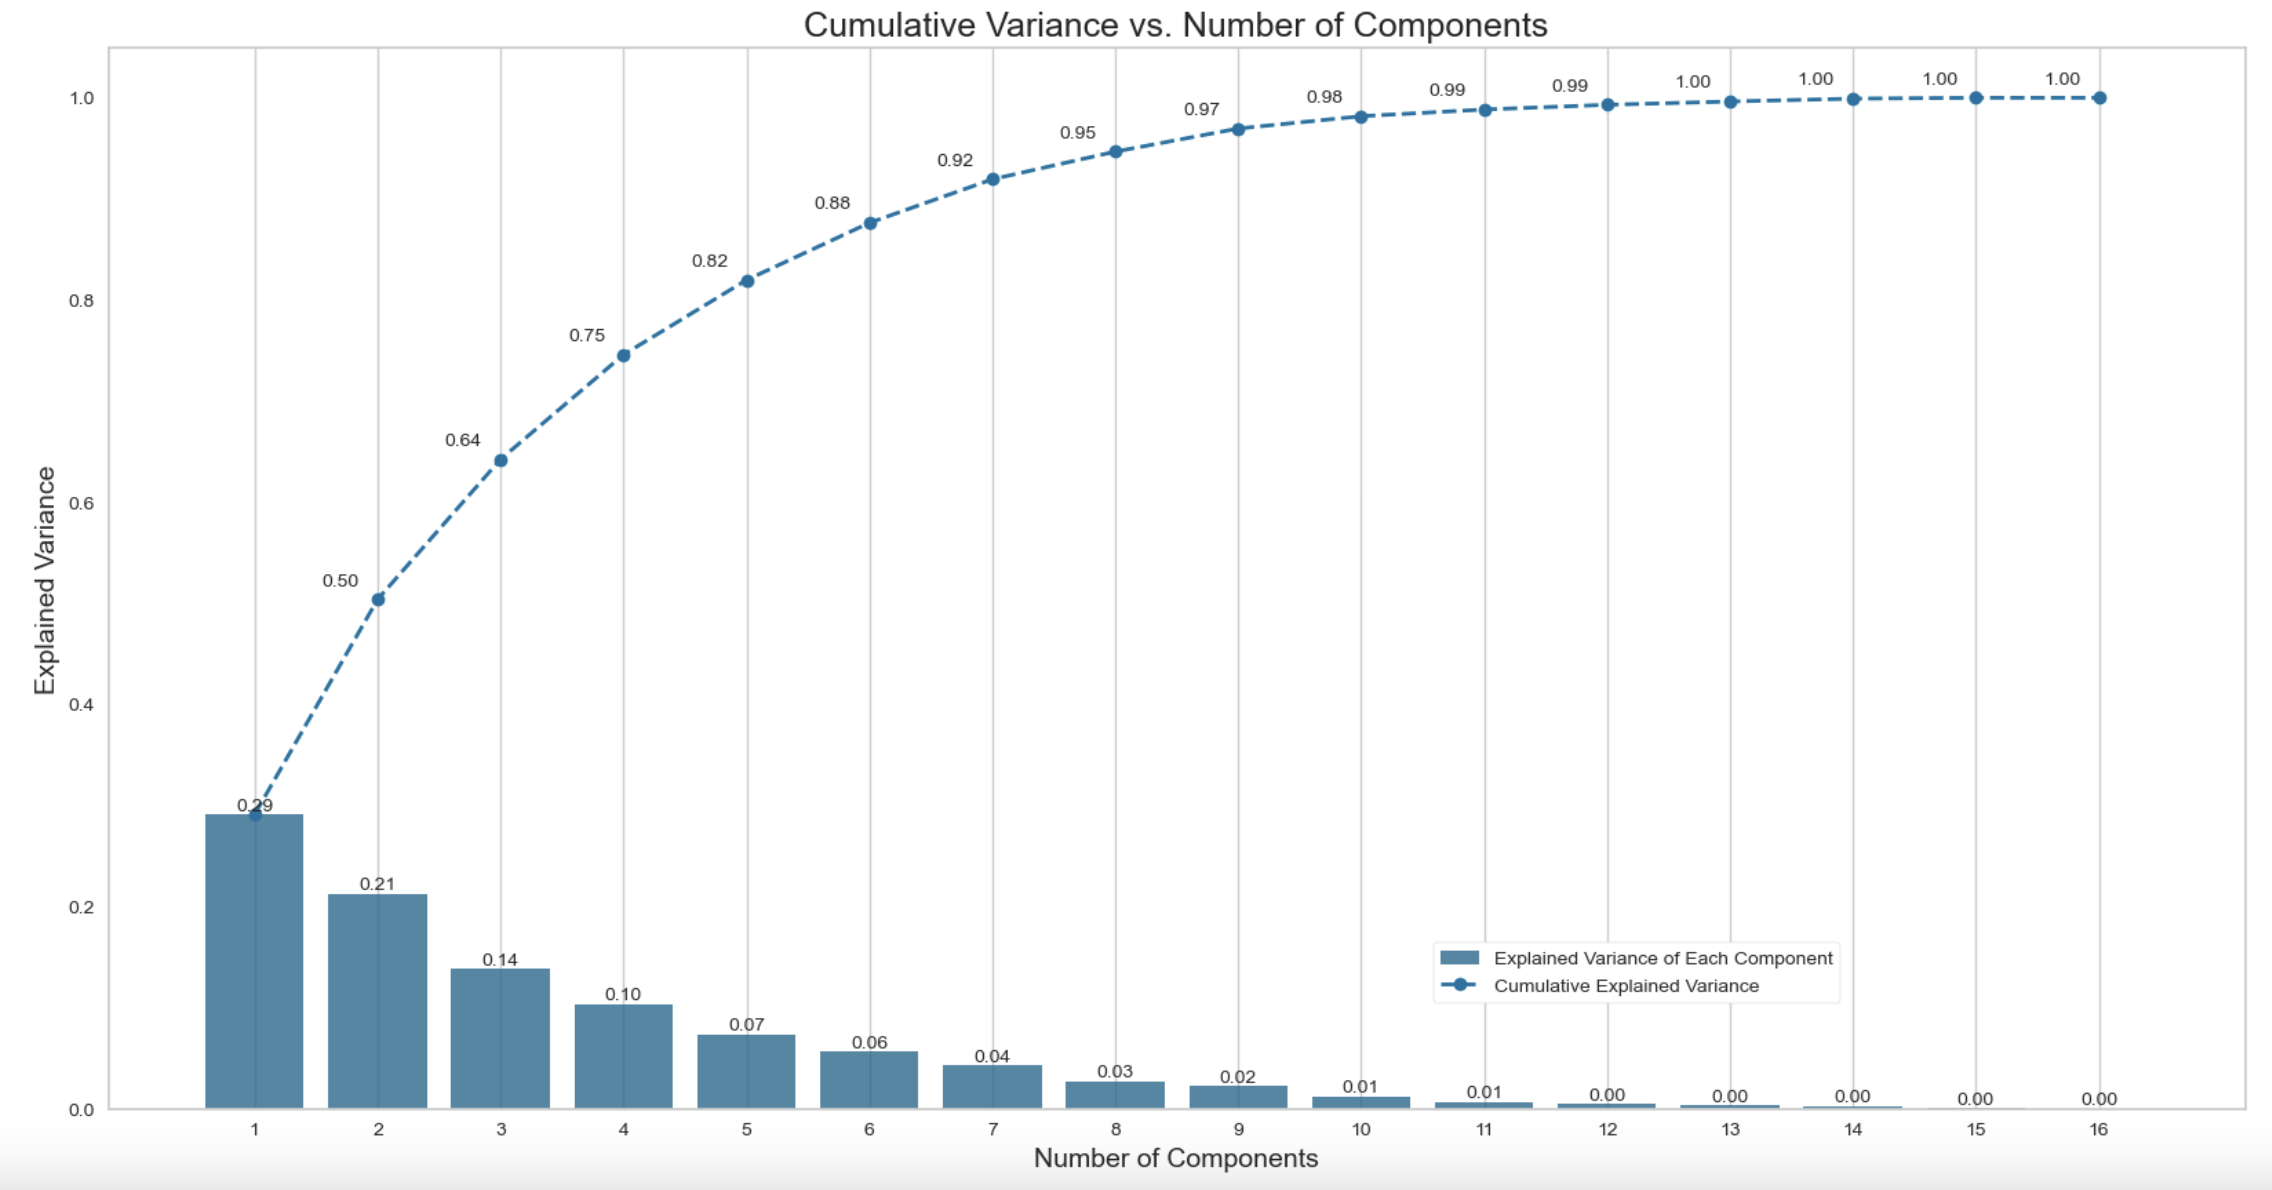

The above plot shows both the variance explained by each singular component and the cumulative variance, reveals a steep rise in the first few components followed by a flattening tail. Specifically, 
- The first component captures approximately 29% of the variance.
- The cumulative variance reaches around 64% by the third component and nearly 88% by the sixth.

This curve shape, commonly referred to as an "elbow", indicates that the data has a strong low-rank structure most of the variability is confined to a few principal directions, while remaining components contribute minimally and likely reflect noise. 

Based on this observation, we selected the first **6** components for dimensionality reduction, striking a balance between preserving information and avoiding overfitting. 
This choice ensured that clustering and visualization would rely on the most meaningful patterns in the data. The decomposition confirms that SVD effectively captures dominant performance trends across driver-race combinations while allowing us to reduce complexity without substantial loss of fidelity.

In the context of our F1 race-day performance data,
- The U matrix represents the projections of each race-driver entry onto the principal components. Each row corresponds to a single driver-race instance and shows its coordinates in the lower-dimensional space. In our case, these are the transformed features used for clustering.
- The V* matrix contains the weights or contributions of the original variables to each principal component.

After analyzing the variance structure of the data through SVD, we proceeded with **Principal Component Analysis (PCA)** to reduce the dimensionality of the dataset while preserving as much of the meaningful variation as possible.

For this project, we selected the first 6 principal components, which together explained approximately 88% of the total variance in the data. This choice was driven by the "elbow" observed in the cumulative variance plot, where the explained variance began to level off, suggesting that most of the signal is concentrated in the first few dimensions.

To visually explore inherent structure, we plotted the data using the first two principal components, as shown below:

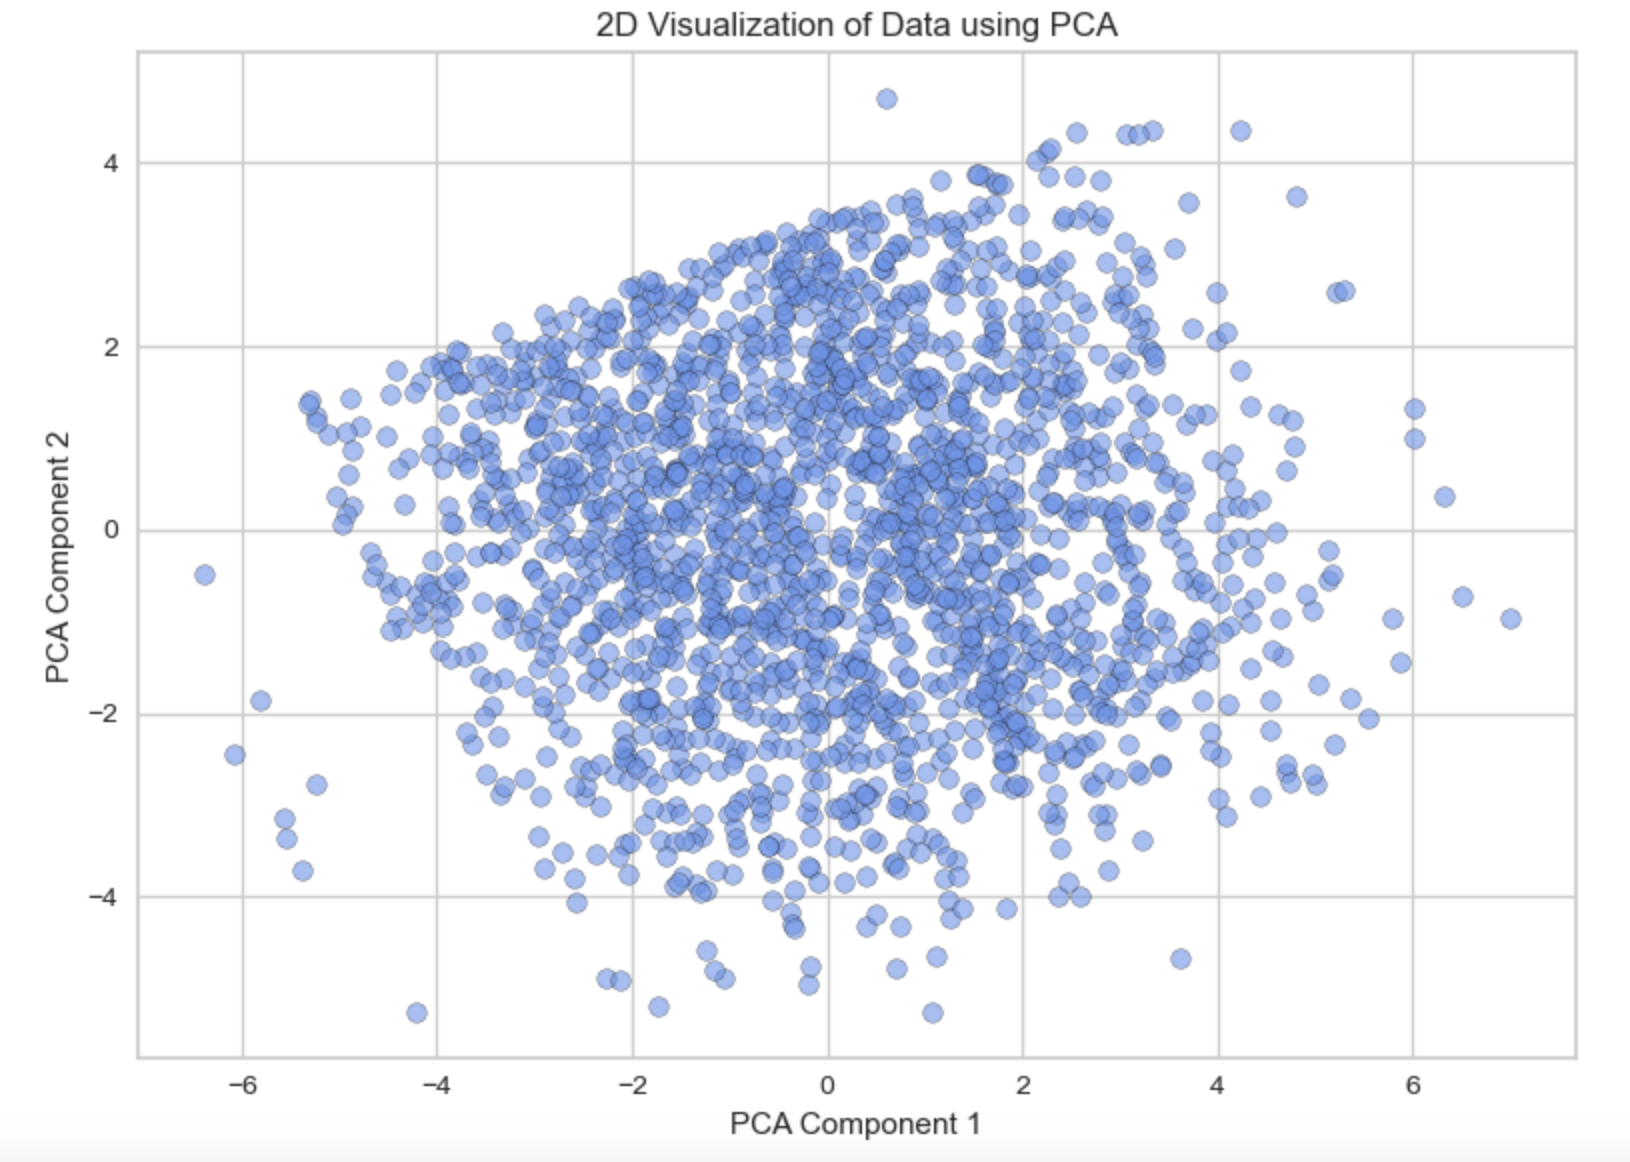

This scatter plot provides a clearer picture of the latent distribution of observations than would be possible using any arbitrary pair of original features. While no strong linear separation is immediately visible, there is evidence of moderate clustering tendencies and variation in density across the PCA space, indicating that the transformed components reveal dimensions along which drivers vary significantly.

Now inorder to understand how different featires influence driver performance, we created a PCA plot which shows feature directions with few driver/race combinations in PCA space.

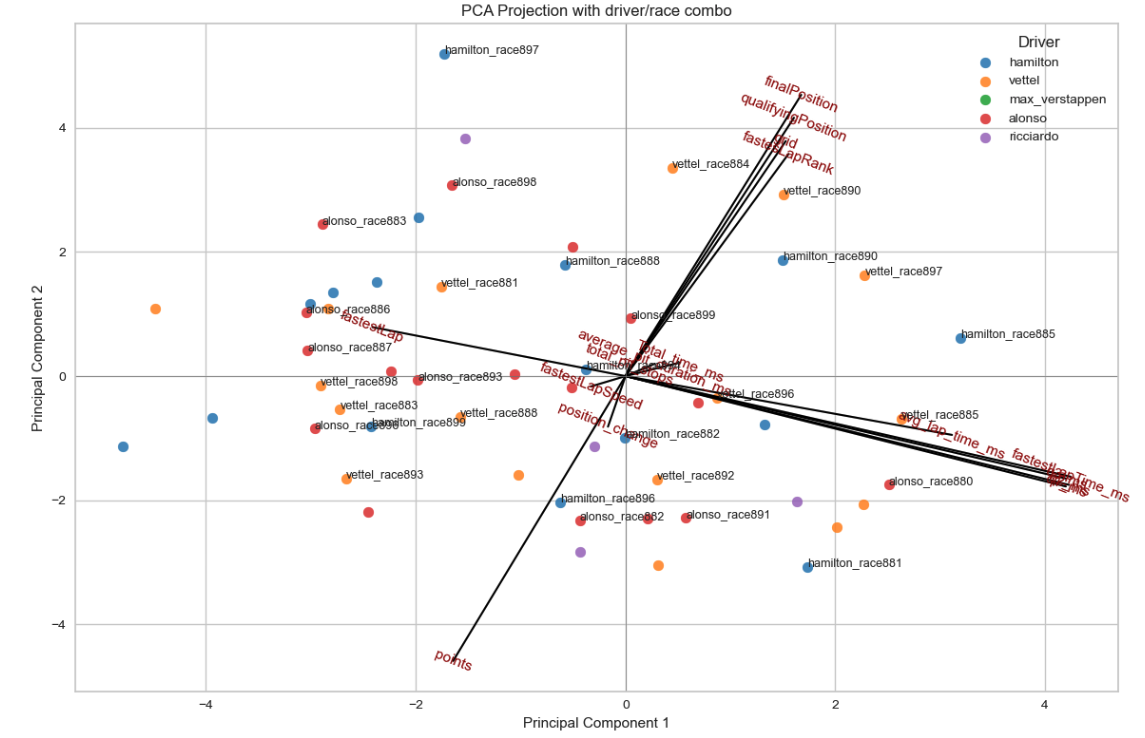

This plot combines the PCA directions for all standardized features with the projections of a few selected drivers across different races. Notably, features such as avg_lap_time_ms, fastestLapTime_ms, q1_ms, q2_ms, and q3_ms have very similar directional influence on PC1 and PC2. Due to their strong correlation, the feature arrows nearly overlap, making them hard to distinguish visually. 

Interpretation of PCA Directions:\
Top Left (−PC1, +PC2): Drivers who started or finished poorly but made up many positions with fast laps.\
Top Right (+PC1, +PC2): Poor performance overall: slow laps, poor qualifying, weak finishing could indicate technical issues or poor strategy.\
Bottom Right (+PC1, −PC2): Drivers who placed well despite slow lap/qualifying times suggesting defensive or opportunistic racing.\
Bottom Left (−PC1, −PC2): Strong performances across the board good qualifying, fast laps, points scored likely wins or podiums.
Looking from the above plot and based on the interpretation we thought of looking into particular driver/race combo (likely in the bottom left) that we can point as having won. This is visualized by focusing on driver/race combinatons where the driver won the race (i.e finalPosition = 1).

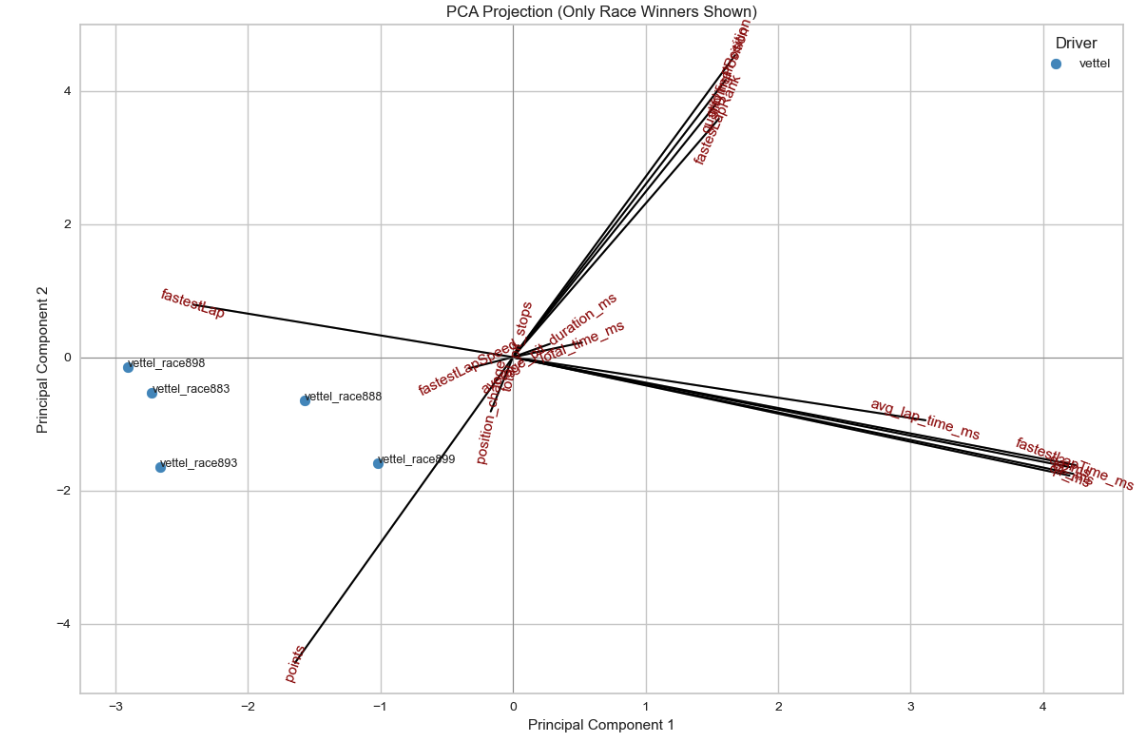

The PCA projection shows that Vettel was the only driver from our selected subset (Hamilton, Alonso, Verstappen, Ricciardo) who achieved wins in the given range of races. His race points fall into the bottom-left quadrant of the PCA space, consistent with the earlier interpretation that this region reflects strong overall performance.

Following dimensionality reduction via PCA, we applied **KMeans clustering** to uncover latent groupings of race-day driver performance profiles. A critical first step in clustering by selecting the optimal number of clusters (k).
To achieve this, we used two widely accepted methods: the Elbow Method and the Silhouette Score. The Elbow Method evaluates the Within-Cluster Sum of Squares (WCSS) across various values of k and identifies a point where the rate of decrease sharply slows this “elbow” represents a good trade-off between model complexity and explanatory power. 

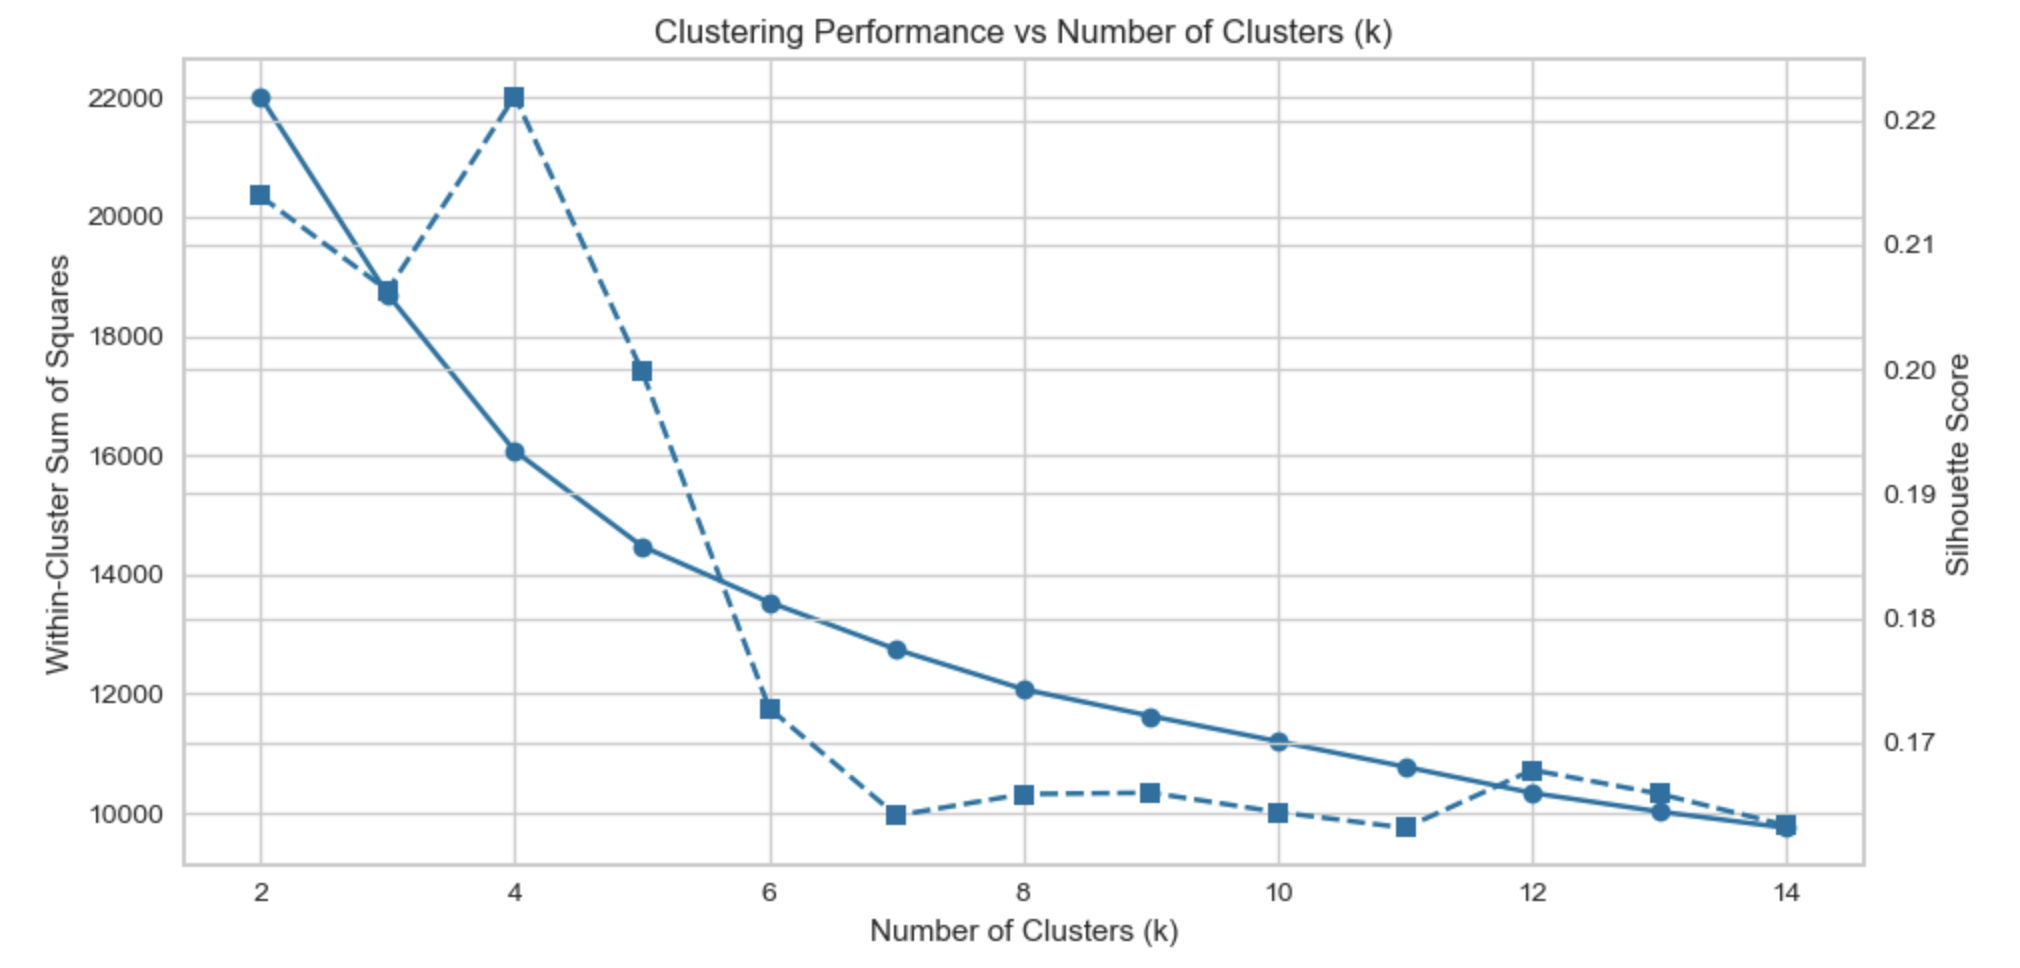

As shown in the elbow plot, the curve levels off around k = 4, suggesting that four clusters effectively capture the diversity in the driver performance profiles without overfitting. This was further supported by the Silhouette Score where after k=4 the score decreases gradually, indicating that k = 4 provided the best cohesion and separation among clusters.

With this optimal value determined, we fit the KMeans algorithm using k = 4 on the six-dimensional PCA-transformed data. The result was a partitioning of driver-race entries into four distinct clusters, each reflecting a unique race-day behavioral pattern. 

A 3D scatter plot of the first three principal components revealed that the clusters exhibit reasonable spatial separation, further validating our dimensionality reduction and clustering pipeline.

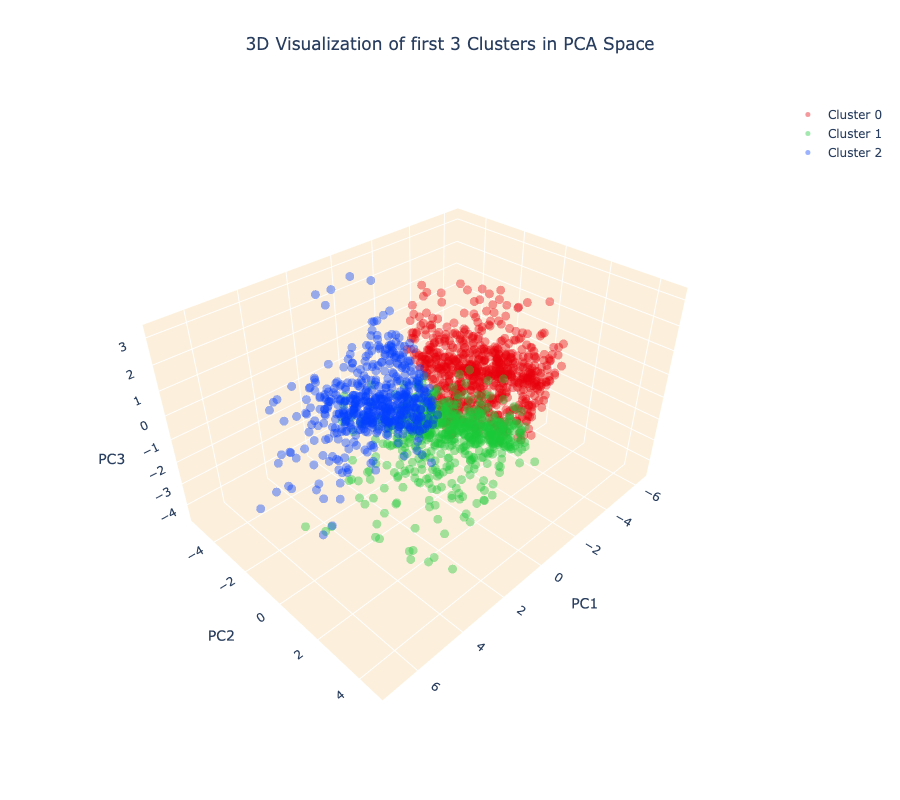

### **K- MEANS CLUSTERING**

We then analyzed the characteristics of each cluster using radar charts, which visualize the key features per cluster.

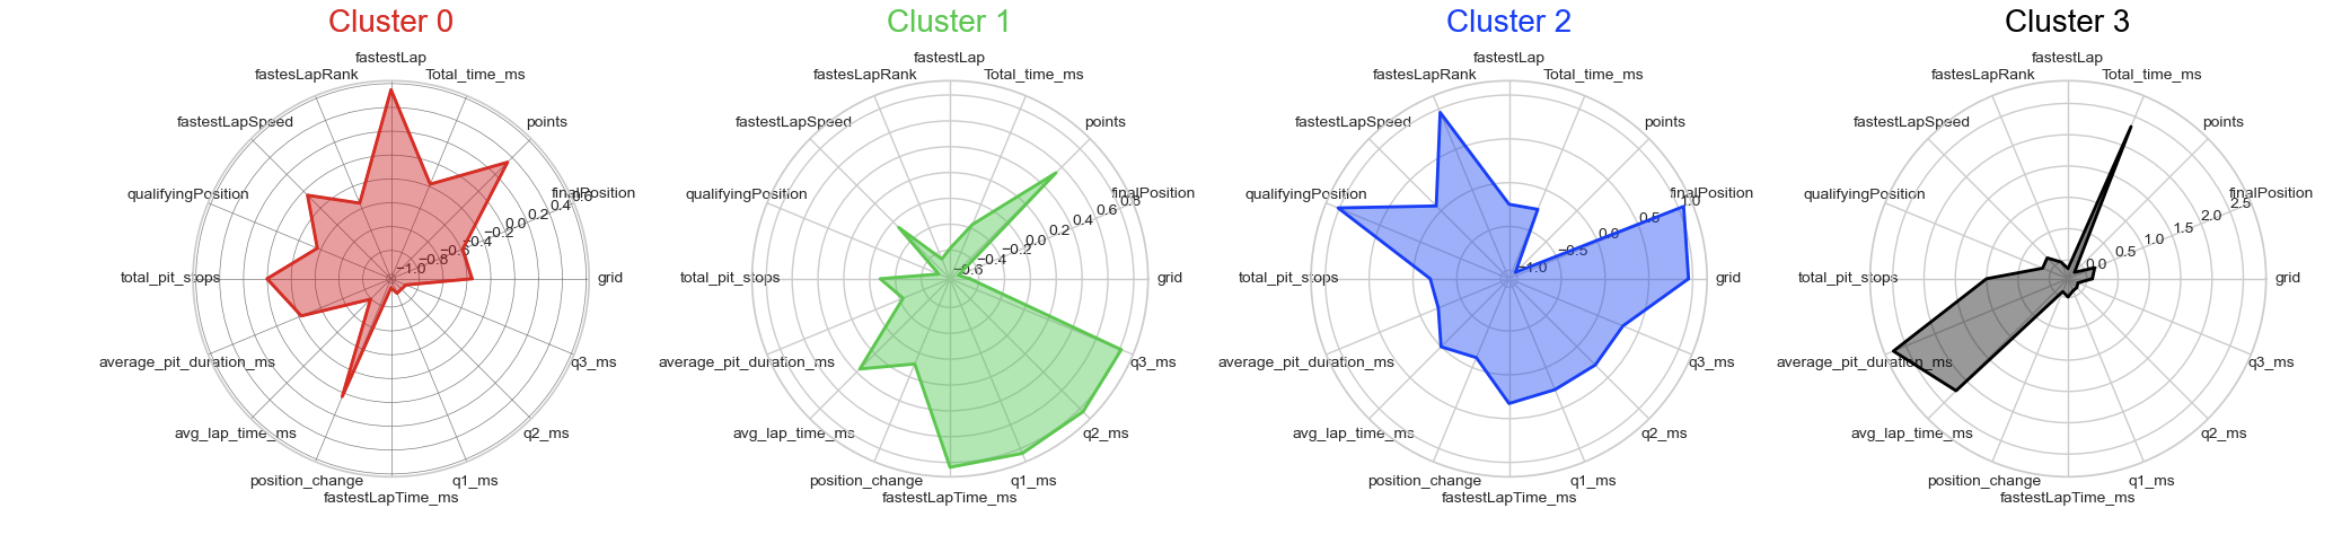


**K-Means Clustering with 4 clusters:**

Using PCA‐reduced data, k-means with n equaling 4 partitions, the 17 scaled race metrics into four performance archetypes. Examining the original features for each cluster via the radar charts and centroids, we get each cluster as below:


**Cluster 0** : It represents the Front-Runners. It displays the drivers with low or better grid positions and maintained the low/ good final positions The drivers present in this cluster share key similarities like High points earned, fastest lap times below average or quick laps with fewer pit stops and shorter total race times. As we can interpret, this cluster reflects the season's fastest, most consistent performers, we can say as the typically podium finishers.

**Cluster 1** : This cluster represents the backmarkers who are the drivers with high or worse grid and finishing positions. The drivers present in this custers have similarities like slow average lap times and high total race times, then records containing many pit stops or unusually long pit durations and minimal points scored in their record. Interpretation from this cluster is that those who spent most of the race at the back often affected by traffic, penalties, or reliability issues.

**Cluster 2** :  This cluster represents the Mid-Field Movers. These are the drivers starting mid-pack who gain positions. The drivers present in this cluster have similarities like moderate average lap times but positive position change, then balanced pit strategy which is neither too few nor too many stops and records with mixed fastest-lap appearances. From this cluster, we can interpret that it contains the competitors who consistently outperformed their qualifying, picking off slower cars effectively.

**Cluster 3** : This cluster represents the outliers or special cases. This cluster conatins the drivers are a small handful with extreme metrics. They share key similarities like very high or very low values on one or two features like drivers with an ultra-fast single lap but poor overall race time, then the drivers with large negative position changes like penalties or retirements. The interpretations made from this clusters are races decided by non-performance factors like mechanical DNFs, safety cars or pit-stop mishaps.

**Why Hierarchical Clustering:**
It will be an alternate clustering method to verfiy results in a better way. Another clustering method we used is Heirarchial Clustering with 4 different types of linkages (single, complete, average and centroid). We constructed different dendrogram for different types of linkages to visualize how individual race-driver form different clusters. This can help us visualize somewhat better with dendrogram and to do an in-depth visual analysis.

### **HIERARCHICAL CLUSTERING**

**Hierarchical Clustering on UNSCALED DATA**:

Key Observations:

**Single linkage**: 
Single linkage results in extremely imbalanced clusters at every k. It has been observed that there is one massive cluster which is dominating in addistions to the very small clusters.



**Complete linkage**:

This linkage on the other hand produces more balanced mid-sized clusters at moderate values of k like 4, 5, 6. It still isolates some true outliers but captures two or three main grouping among the bulk of the data.

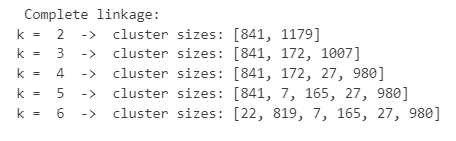



**Average and Centroid linkage**:

If we see at thee both linkage types, they are giving outcomes similar to the single linkage. It is same like one is a dominating cluster and other very small clusters/ few outliers.


**Hierarchical Clustering on SCALED DATA:**

We first considered 100 sub-sampled data, scaled the subsampled numeric features dropping non-numeric columns.

Key Observations:

**Effects of feature scaling on below linkage types**:

**Single Linkage**:

It helps in normalizing the features slightly changes the linkage distances still forms one giant cluster containing almost all points, with each outlier split off.

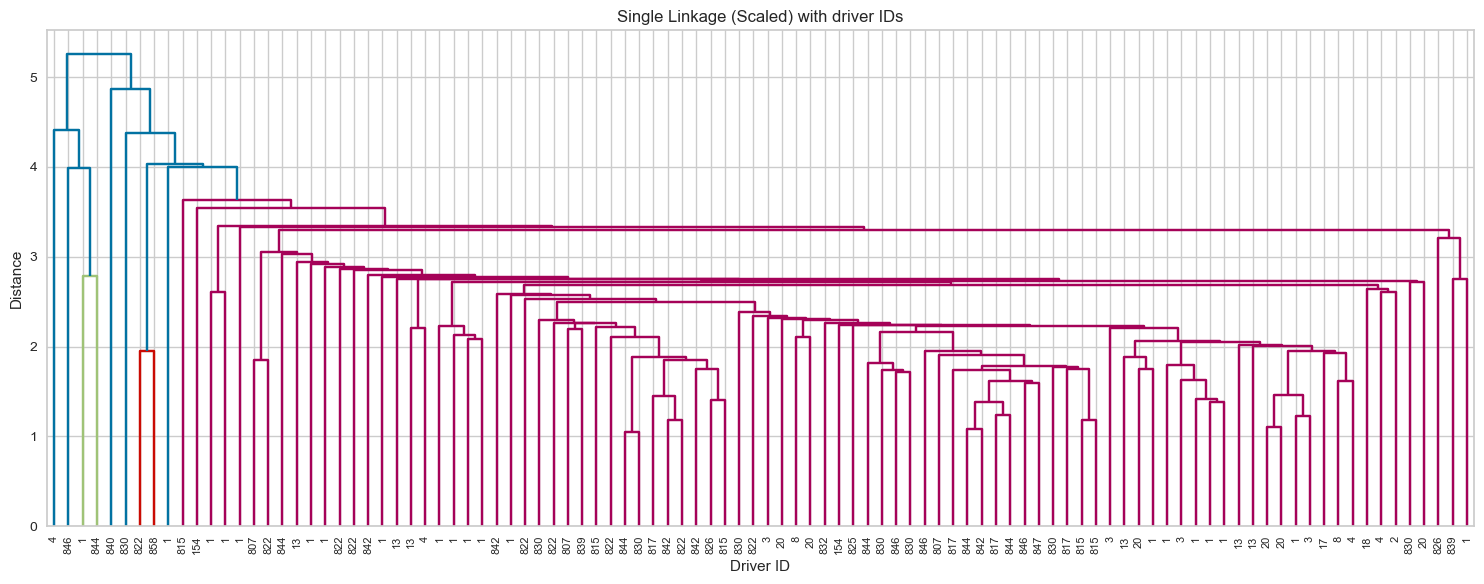
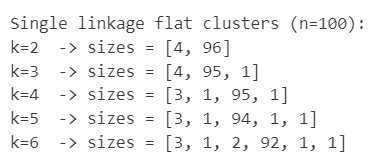



**Complete Linkage**:

This linkage type is way better than other linkage types as it is more balanced groupings as scaling yields two or three mid-sized clusters instead of a single massive one. In here, the outliers continue to be isolated as tiny clusters, but is now spread more evenly across clusters. It seems to be the best linkage type for this dataset as it is properly or efficiently dividing the scaled data into clusters.

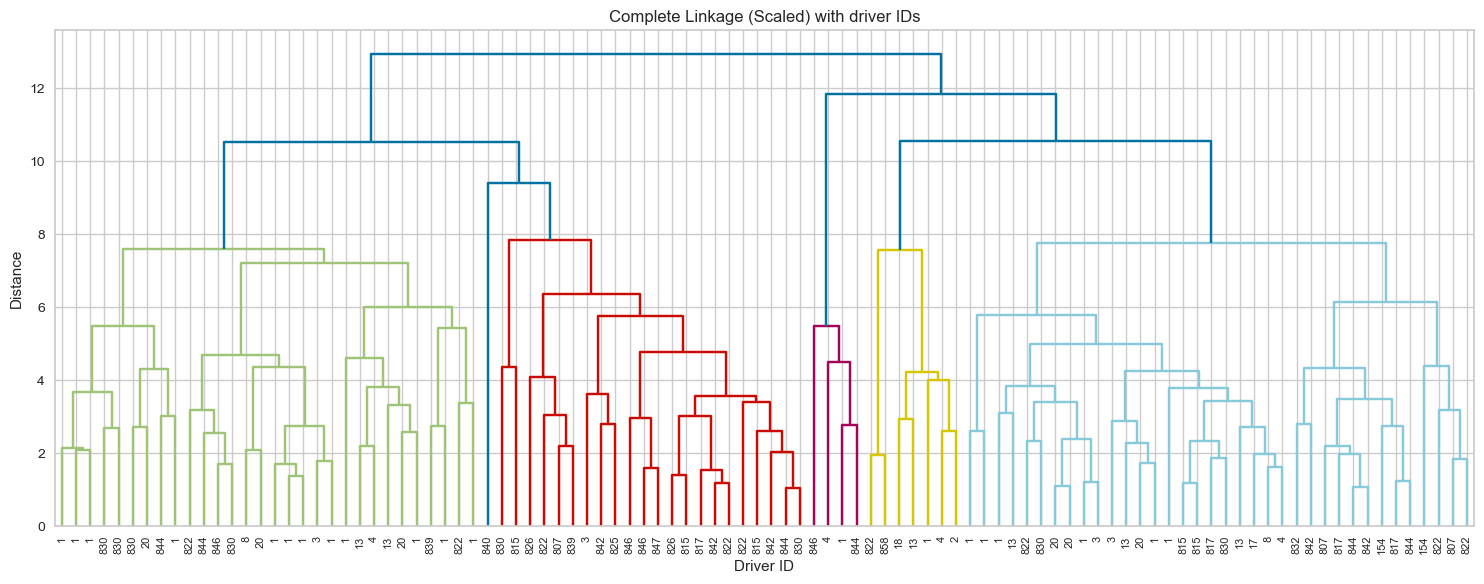
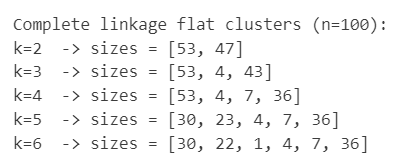



**Average Linkage**:

This linkage types still produces one dominant cluster holding most points, and addition to that it has a smaller secondary cluster and a few singleton outliers. 

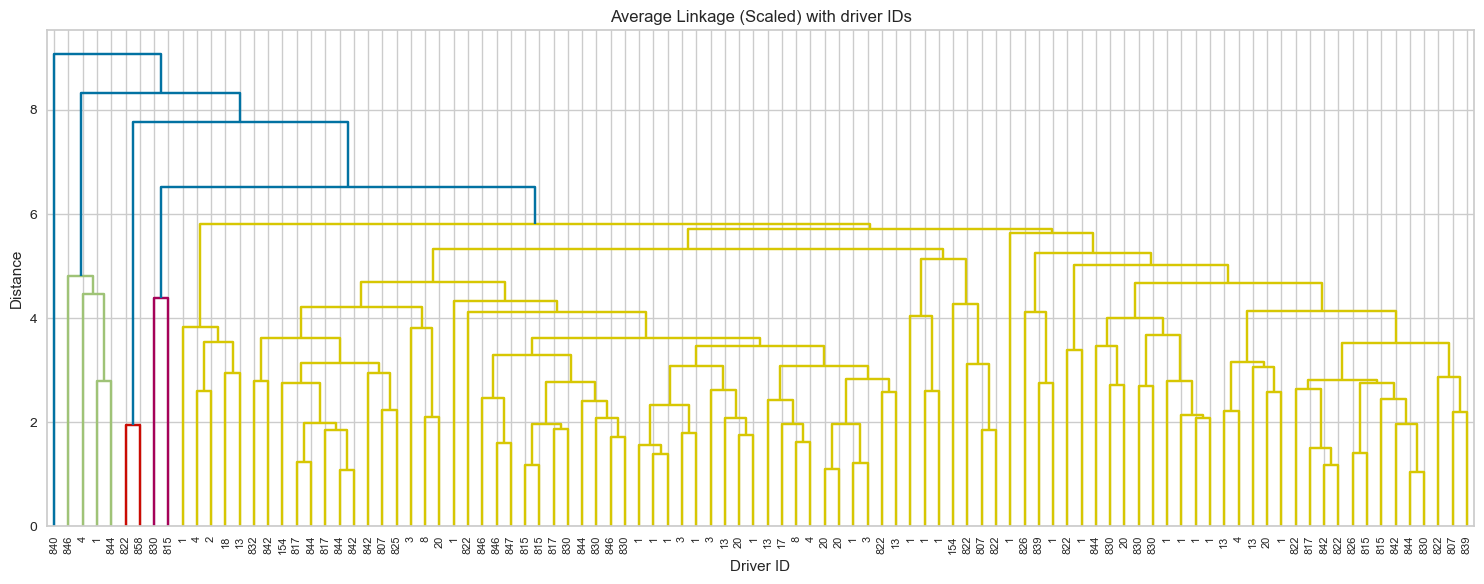
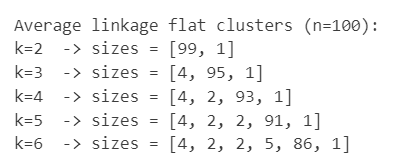



**Centroid Linkage**:

From the centroid linkage type, I can interpret that scaling makes centroid calculations more stable, but still the issue with big cluster and outliers persists which is already observed before scaling.

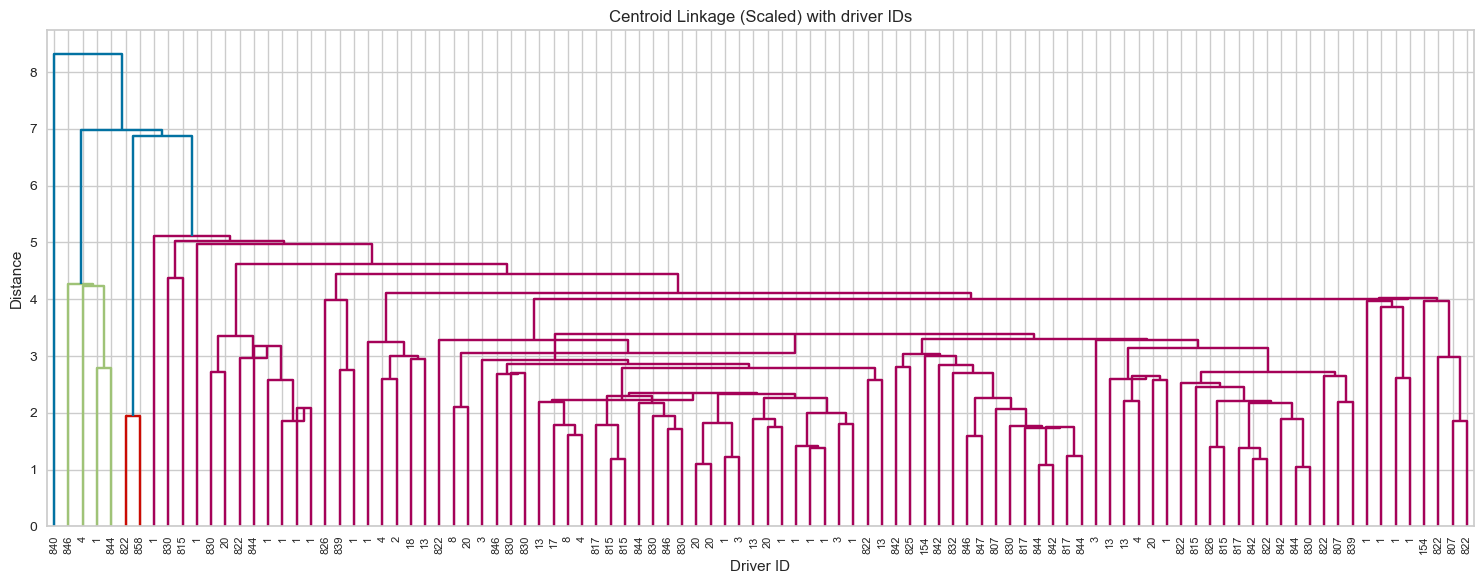
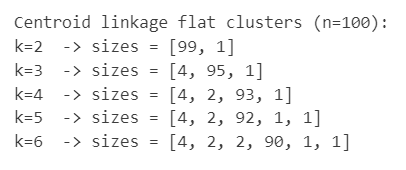



After the Professor comments we received in our first submission, we made key changes in the code. We identified that the  circle marker or circular oval or solid dots in our previous visualizations were due to the use of two parameters used in our previous code. The two parameters are **truncate_mode='lastp' and p=12** and **show_contracted=True**.

Both parameters by default marked all the position of each of the 12 labelled observations specifically on the leaf, in the truncated tree with circle marker and when we remove, it just released and displayed all the last 12 leaves which are each of those 12 driver IDs. 

This is also because show_contracted=True instructs Scipy to collapse all of the merges before those last 12 into single nodes. So, at each point, entire sub-tree has been collapsed. To cover that up, Scipy draws a samll circle at the height of that merge. So, the dots represents truncations and group of observations which were not been dispayed or expanded.


**Difference observed after scaling data:**

The difference obsereved with scaling is that scaling balances the influence of each feature, so no single variable with a large range dominates the clustering. It complete linkage benefits most, producing noticeably more even cluster sizes once features are standardized. But scaling doesn't help or better the situation with single, average and centroid linkages as they remain largely unchanged in pattern.

#### **Overall Interpretation**:

As from the above results with cool and insightful visualizations, we can say that both methods agree on three main performance tiers - front-runners, mid-field movers, backmarkers and a handful of outlier racers.

We can say that feature scaling was crucial as it ensures no single metric like total race time overwhelms the clustering. This lets subtle patterns (example, qualifying vs race pace) emerge.

These clusters map directly onto strategic archetypes like Aggressive/ fast strategy as Cluster 0, Balanced racecraft as Cluster 2, Conservative/ high-traffic as Cluster 1 and Exceptional events as Cluster 3.

By labeling each driver-race with its cluster, we can track how different teams or drivers shift strategies across circuits or seasons.

## 🕑**CONCLUSION**

In this project, we collaboratively explored the use of unsupervised learning techniques to analyze and cluster Formula 1 drivers based on race-day performance data. Rather than relying solely on final positions or championship points, we engineered and integrated diverse features such as qualifying session times, average lap time, pit stop behavior, and position change to build a more holistic representation of each driver’s performance. Through dimensionality reduction using SVD and PCA, followed by K-Means and Hierarchical clustering, we identified distinct performance profiles that provide new perspectives on how drivers compete during a race.
 
The broader impact of our work lies in its ability to offer a data-driven interpretation of race strategy and execution, enabling analysts, teams, and fans to look beyond the leaderboard. These insights can assist F1 teams in tailoring strategies to driver strengths.
 
Beyond the context of Formula 1, our methodology offers a generalizable framework for analyzing and organizing high-dimensional data in domains where labels are unavailable or difficult to define. For example, similar techniques can be used in marketing to segment customers by purchasing behavior without predefined categories, or in education to group students based on learning behavior for personalized instruction.

## 📅**REFERENCES:**

[1] GeeksforGeeks, “K means Clustering – Introduction,” GeeksforGeeks, 13 May 2025. [Online]. Available: https://www.geeksforgeeks.org/k-means-clustering-introduction/. [Accessed: 21 May 2025]. 
GeeksforGeeks

[2] GeeksforGeeks, “Hierarchical Clustering in Machine Learning,” GeeksforGeeks, 04 Feb. 2025. [Online]. Available: https://www.geeksforgeeks.org/hierarchical-clustering/. [Accessed: 14 May 2025]. 
GeeksforGeeks

[3] R. Rao, “Formula 1 World Championship (1950 – 2020),” Kaggle, 2024. [Online]. Available: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020. [Accessed: 16 May 2025]. 
Kaggle

[4] M. Cone, “Markdown Cheat Sheet,” Markdown Guide, 2025. [Online]. Available: https://www.markdownguide.org/cheat-sheet/. [Accessed: 18 May 2025]. 
markdownguide.org

[5] The scikit-yb developers, “Yellowbrick,” PyPI, Aug. 21 2022. [Online]. Available: https://pypi.org/project/yellowbrick/. [Accessed: 16 May 2025]. 